/usr/local/lib/python3.11/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


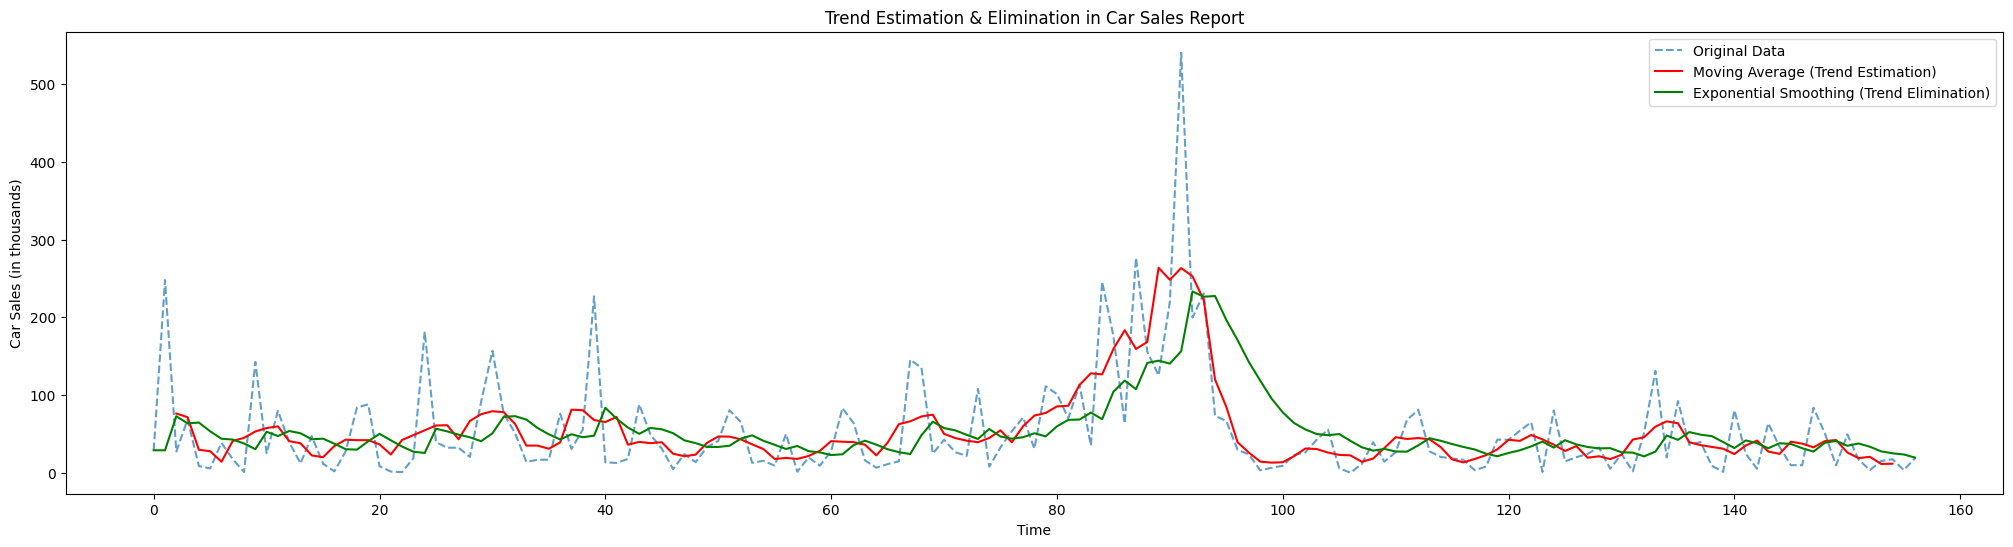

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing

# Load dataset (Ensure car_sales_report.csv is uploaded to /content/sample_data/)
file_path = "/content/sample_data/Car_sales.csv"
df = pd.read_csv(file_path)

# Convert 'Latest_Launch' to datetime format
df['Latest_Launch'] = pd.to_datetime(df['Latest_Launch'], errors='coerce')

# Sort dataset based on the 'Latest_Launch' column
df = df.sort_values(by='Latest_Launch').reset_index(drop=True)

# Create a numerical time index
df['Time'] = np.arange(len(df))

# Selecting relevant columns for trend analysis
time = df['Time']
values = df['Sales_in_thousands']  # Sales data

# Moving Average for Trend Estimation
window_size = 5  # Adjust window size based on data
df['Moving_Avg'] = values.rolling(window=window_size, center=True).mean()

# Exponential Smoothing for Trend Elimination
alpha = 0.2  # Smoothing factor
ses_model = SimpleExpSmoothing(values).fit(smoothing_level=alpha)
df['Smoothed'] = ses_model.fittedvalues

# Plot Original Data, Moving Average & Smoothed Data
plt.figure(figsize=(25, 6))
plt.plot(time, values, label='Original Data', linestyle='dashed', alpha=0.7)
plt.plot(time, df['Moving_Avg'], label='Moving Average (Trend Estimation)', color='red')
plt.plot(time, df['Smoothed'], label='Exponential Smoothing (Trend Elimination)', color='green')
plt.xlabel('Time')
plt.ylabel('Car Sales (in thousands)')
plt.legend()
plt.title('Trend Estimation & Elimination in Car Sales Report')
plt.show()
